## Try to improve the linear regression model. Score in part 6 was .77

In [33]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## use the concept of multicollinearity and remove insignificant variables

In [42]:
data = pd.read_csv('/Users/elsames/numerical_data_from_round4.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data1 = data.copy()
X_cat = pd.read_csv('X_cat_encoded.csv')
X_cat = X_cat.drop(['Unnamed: 0'], axis=1)

In [84]:
y = data['total claim amount']
X = data.drop(['total claim amount'], axis=1)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.score(X,y) #score is .521

0.5206511032850021

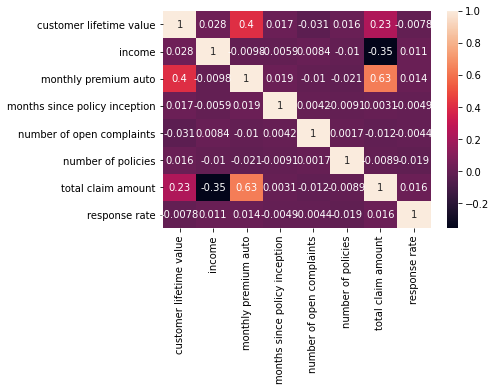

In [38]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

No variables have a strong correlation, but 'monthly premium auto' has the highest, so I will try removing 
that variable to see how it affects the linear regression.

In [44]:
X1 = X.drop(['monthly premium auto'], axis=1)

#using MinMaxScaler
transformer = MinMaxScaler().fit(X1)
x_normalized = transformer.transform(X1)
print(x_normalized.shape)
data_normalized = pd.DataFrame(x_normalized, columns=X1.columns)

#concatenating with categorical features
data2 = pd.concat([data_normalized, X_cat], axis=1)

y = data['total claim amount']
X2 = data2
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=100)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
lm.score(X2,y)  #score is .735

(10910, 6)


0.7353122451338796

score decreased to .735

## use a different method of scaling the numerical variables

In [60]:
#using StandarScaler
Standardtransformer = StandardScaler().fit(X)
x_standardized = Standardtransformer.transform(X)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized, columns=X.columns)

#concatenating with categorical features
data3 = pd.concat([x_standardized, X_cat], axis=1)

y = data['total claim amount']
X3 = data3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y, test_size=0.2, random_state=90)

lm = linear_model.LinearRegression()
model = lm.fit(X_train2,y_train2)
predictions = lm.predict(X_test2)
lm.score(X3,y)  #score is .77

(10910, 7)


0.7706200768576049

score is the same at .77

## use a different ratio of train test split

In [86]:
y = data['total claim amount']
X2 = data2
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=100)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
lm.score(X2,y)  #score is .7355

0.7354986685492024

In [87]:
y = data['total claim amount']
X2 = data2
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.35, random_state=100)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
lm.score(X2,y)  #score is .7351

0.7351372949522088

score doesn't change

## use the transformation on numerical columns which align it more towards a normal distribution   (logarithmet transformation?)

using logarithmic transformation

In [85]:
def log_transform_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 
    
original_columns = X.columns
X_original = X.copy()
    
for col in original_columns:
    new_name = col +'_log'
    X[new_name] = list(map(log_transform_clean, X[col]))
    X[new_name] = X[new_name].fillna(np.mean(X[new_name]))

X_transformed = X.copy()
for col in X_transformed:
    if col in X_original.columns:
        X_transformed = X_transformed.drop([col], axis=1)
        
X_transformed

/var/folders/tg/qj8xd12d4kldbd9gnfgt88th0000gn/T/ipykernel_81857/152999934.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


,customer lifetime value_log,income_log,monthly premium auto_log,months since policy inception_log,number of open complaints_log,number of policies_log,response rate_log
0,3.682074,4.681504,1.785330,1.716003,0.201552,0.954243,0.0
1,3.348018,4.644014,1.806180,1.414973,0.201552,0.000000,0.0
2,4.174581,4.345158,2.000000,1.491362,0.201552,0.301030,0.0
3,4.348936,4.690887,1.986772,0.477121,0.201552,0.301030,0.0
4,3.955450,4.374290,2.068186,1.491362,0.201552,0.845098,0.0
...,...,...,...,...,...,...,...
10905,4.192104,4.644014,2.403121,1.602060,0.201552,0.845098,0.0
10906,3.720940,4.786368,1.812913,1.832509,0.201552,0.778151,0.0
10907,4.378276,4.600287,2.303196,1.799341,0.201552,0.301030,0.0
10908,4.078166,4.807501,2.198657,1.431364,0.602060,0.778151,0.0


In [88]:
#concatenating with categorical features
data4 = pd.concat([X_transformed, X_cat], axis=1)

y = data['total claim amount']
X4 = data4
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=100)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
lm.score(X4,y)  #score is .76

0.7602462285764218

score decreased to .76